In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
coursera_df = pd.read_csv('coursera_data_clean.csv')

# Basic Information

- The data was largely clean with no duplicates, correct data types, no null values, and nothing super out of place. It includes 7 features, 4 of them categorical and 3 of them numerical. 

- I did find some outliers. Seeing as my intention was to understand the data, I decided not to remove any outliers. 

- A full dive into the code and process can be seen in the accompanying EDA. 

## At a glance

### Columns

- course_title : The course title.
- course_organization : The name of the organization conducting the course.
- courseCertificatetype : The different certifications available in a course.
- course_rating : The ratings associated with each course.
- course_difficulty : The difficulty level of the course.
- coursestudentsenrolled : The number of students that are enrolled in the course.

### Descriptive Statistics

In [5]:
coursera_df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


# Top Insights

### 1. High Course Quality:

The majority of the courses on Coursera have received high ratings, with a median rating close to 4.7. This suggests that the platform maintains a consistently high standard of course quality.

The histogram shows the distribution of course ratings, highlighting that most courses have ratings between 4.5 and 5.0, indicating high course quality.

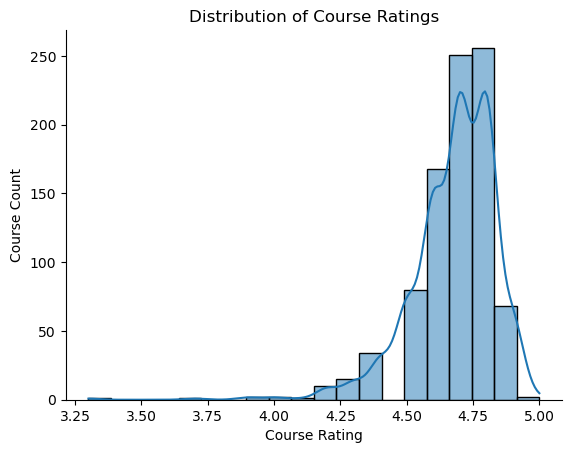

In [6]:
ax = sns.histplot(coursera_df['course_rating'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Course Count')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 2. Popularity vs. Quality:

There's a very weak positive correlation (approximately 0.07109) between course rating and the number of students enrolled. This means that a course's popularity (in terms of student enrollments) doesn't necessarily dictate its quality (as represented by the rating), and vice versa. Some highly popular courses (with high enrollments) still manage to maintain excellent ratings, indicating the ability to cater to a large audience without compromising on quality.

The scatter plot visualizes the relationship between course rating and the number of students enrolled. It's evident that even some courses with very high enrollments maintain high ratings.

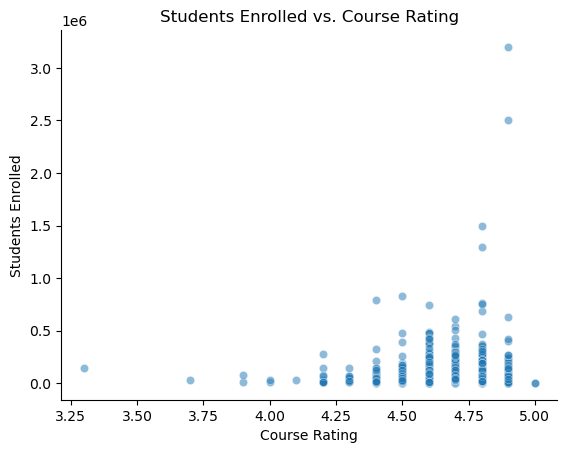

In [8]:
ax = sns.scatterplot(data=coursera_df, x='course_rating', y='course_students_enrolled', alpha=0.5)
plt.title('Students Enrolled vs. Course Rating')
plt.xlabel('Course Rating')
plt.ylabel('Students Enrolled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 3. Course Offerings and Difficulty:

Most courses on Coursera are designed for beginners, followed by mixed-level, intermediate, and advanced courses. This indicates that Coursera might be a go-to platform for many individuals starting their learning journey in various domains.

The count plot displays the distribution of courses based on their difficulty levels. Beginner courses dominate the platform, followed by mixed-level, intermediate, and advanced courses.

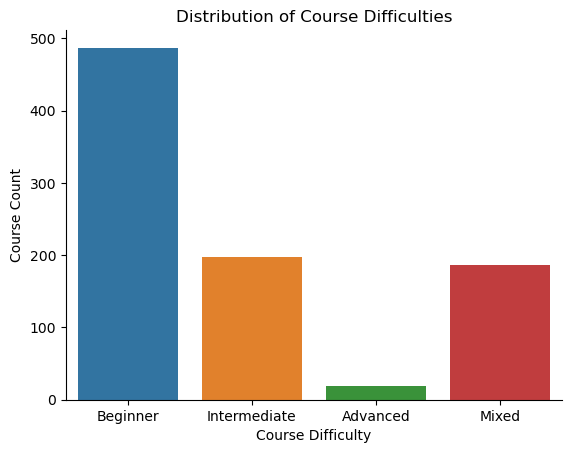

In [9]:
ax1 = sns.countplot(data=coursera_df, x='course_difficulty', order=['Beginner', 'Intermediate', 'Advanced', 'Mixed'])
plt.title('Distribution of Course Difficulties')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Count')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.show()

### 4. Top Organizations and Their Focus:

The top organizations, such as Google Cloud and deeplearning.ai, not only have a significant presence on Coursera but also display certain patterns in course offerings. For instance, Google Cloud and deeplearning.ai seem to have a focus on intermediate courses. Understanding these patterns can help potential learners make informed decisions based on their learning objectives and the expertise of the course providers.

The bar plot breaks down the course offerings of the top 5 organizations by difficulty. This provides insight into the specializations or focuses of these top organizations.

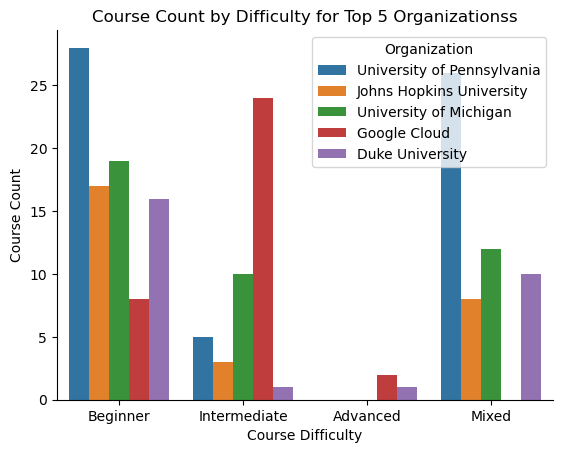

In [13]:
top_orgs = coursera_df['course_organization'].value_counts().index[:5]
subset_data = coursera_df[coursera_df['course_organization'].isin(top_orgs)]
ax = sns.countplot(data=subset_data, x='course_difficulty', hue='course_organization',  order=['Beginner', 'Intermediate', 'Advanced', 'Mixed'])
plt.title('Course Count by Difficulty for Top 5 Organizationss')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Count')
plt.legend(title='Organization')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 5. Certificate Types and Their Popularity:

Standalone courses are the most prevalent on Coursera, but professional certificates and specializations also have courses with notably high enrollments. This suggests that while many learners might prefer individual courses, there's also a substantial interest in comprehensive learning paths that offer professional certificates or specializations.

The distribution of certificate types is shown in the count plot, with standalone courses being the most prevalent. The bar plot depicts the average number of students enrolled for each certificate type, highlighting that professional certificates and specializations tend to have higher enrollments on average.

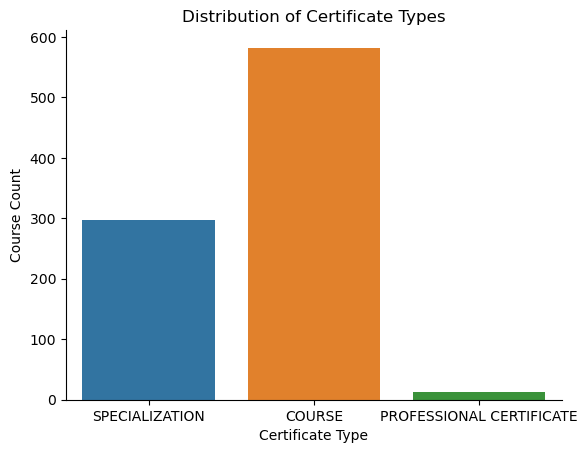

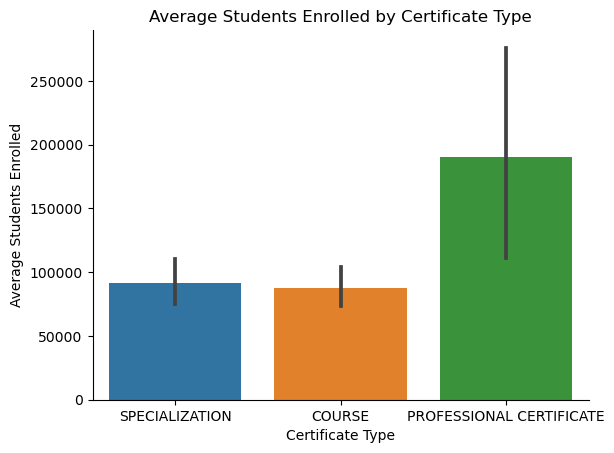

In [14]:
ax = sns.countplot(data=coursera_df, x='course_Certificate_type')
plt.title('Distribution of Certificate Types')
plt.xlabel('Certificate Type')
plt.ylabel('Course Count')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

ax = sns.barplot(data=coursera_df, x='course_Certificate_type', y='course_students_enrolled')
plt.title('Average Students Enrolled by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Average Students Enrolled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()